In [1]:
import random

import pandas as pd
import numpy as np
import scanpy as sc
import anndata as an
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from scipy.stats import entropy

from enlight.plotting.colors import geneset_map

/Users/adr/miniconda3/envs/CAR_env2/lib/python3.10/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [2]:
sns.set(font="Arial")
sns.set_context("paper")
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['ytick.left'] = True

In [3]:
adata = sc.read_h5ad("/path/to/data/20240229_from_rocio_for_manuscript.h5ad")


In [4]:
file = open("/path/to/functional_genes.txt", "r")
content=file.readlines()
file.close()
func = [s.strip() for s in content]
print(func)

['IFNG', 'ID2', 'ZEB2', 'TIGIT', 'FOS', 'MKI67', 'PRF1', 'CCNA2', 'IL1B', 'CCL3', 'CCL4', 'IL7R', 'CDK1', 'IRF4', 'CCL1', 'CD2', 'G0S2', 'CD160', 'GZMK', 'CD3E', 'IL13', 'BATF3', 'BTLA', 'CENPV', 'CD244', 'ENTPD1', 'IL17RA', 'EOMES', 'KLF2', 'NCR1', 'CCR7', 'NKG7', 'NCAM1', 'ORC6', 'IL1A', 'TNFRSF18', 'TBX21', 'LIF', 'CXCL8', 'CD226', 'GZMB', 'LEF1', 'LAYN', 'IL2', 'IL2RA', 'PRDM1', 'HAVCR1', 'GZMA', 'HAVCR2', 'FOXP1', 'CSF2', 'SELL', 'LAG3', 'IL10', 'ADORA2A', 'HOPX', 'CD28', 'TNFRSF4', 'CD27', 'IL16', 'TNFRSF9', 'PDCD1', 'CTLA4', 'GZMH', 'ICOS', 'CCL20', 'ZNF683', 'GNLY', 'KLRG1', 'CDCA2', 'STAT1', 'CCL5', 'TNF', 'BATF', 'KIR3DL1', 'TCF7', 'CD69']


In [5]:
file = open("/path/to/random_all_cars.txt", "r")
content=file.readlines()
file.close()
randgenes = [s.strip() for s in content]
print(random)

<module 'random' from '/Users/adr/miniconda3/envs/CAR_env2/lib/python3.10/random.py'>


In [6]:
file = open("/path/to/functional_and_score_genes.txt", "r")
content=file.readlines()
file.close()
funcscore = [s.strip() for s in content]
print(funcscore)

['IFNG', 'ID2', 'ZEB2', 'TIGIT', 'FOS', 'MKI67', 'PRF1', 'CCNA2', 'IL1B', 'CCL3', 'CCL4', 'IL7R', 'CDK1', 'IRF4', 'CCL1', 'CD2', 'G0S2', 'CD160', 'GZMK', 'CD3E', 'IL13', 'BATF3', 'BTLA', 'CENPV', 'CD244', 'ENTPD1', 'IL17RA', 'EOMES', 'KLF2', 'NCR1', 'CCR7', 'NKG7', 'NCAM1', 'ORC6', 'IL1A', 'TNFRSF18', 'TBX21', 'LIF', 'CXCL8', 'CD226', 'GZMB', 'LEF1', 'LAYN', 'IL2', 'IL2RA', 'PRDM1', 'HAVCR1', 'GZMA', 'HAVCR2', 'FOXP1', 'CSF2', 'SELL', 'LAG3', 'IL10', 'ADORA2A', 'HOPX', 'CD28', 'TNFRSF4', 'CD27', 'IL16', 'TNFRSF9', 'PDCD1', 'CTLA4', 'GZMH', 'ICOS', 'CCL20', 'ZNF683', 'GNLY', 'KLRG1', 'CDCA2', 'STAT1', 'CCL5', 'TNF', 'BATF', 'KIR3DL1', 'TCF7', 'CD69', 'IL4', 'IL5', 'CRTAM', 'XCL1', 'XCL2']


In [7]:
file = open("/path/to/hvg_all_cars.txt", "r")
content=file.readlines()
file.close()
hvgenes = [s.strip() for s in content]
print(hvgenes)

['TNFRSF4', 'MKI67', 'C15orf48', 'IL3', 'CSF2', 'IL5', 'IL13', 'IL4', 'IFI27', 'HIST1H3B', 'HIST1H4C', 'HIST1H1D', 'LGMN', 'HIST1H1B', 'GZMB', 'LTA', 'TNF', 'GZMH', 'HLA-DRB1', 'PMCH', 'HILPDA', 'TRBV28', 'IL22', 'IFNG', 'CTSL', 'GZMK', 'CRTAM', 'MT1E', 'CCL1', 'TOP2A', 'CYP1B1', 'CD40LG', 'GNLY', 'IL2', 'CCL4', 'CCL3', 'IL17RB', 'CENPF', 'ZBED2', 'APOD', 'ASPM', 'CXCL10', 'XCL1', 'HERC5', 'XCL2', 'PMAIP1', 'MT2A', 'HLA-DQA1', 'PLEK', 'CXCL8', 'TNIP3', 'MT1G', 'CCL4L2', 'IER3', 'NR4A3', 'IL10', 'CCNI2', 'IL26', 'EGR3', 'LIF', 'IL1RN', 'GZMA', 'HMGB2', 'NR4A2', 'XIRP1', 'HLA-DRA', 'CCL3L1', 'IL21', 'CST6', 'FABP5', 'RRAD', 'CCL20', 'SERPINE1', 'RRM2', 'G0S2', 'EGR1', 'SPP1', 'TNFRSF9', 'IL23A', 'HIST1H3G', 'OSM']


In [8]:
adata.layers["raw"] = adata.X.copy()
sc.pp.normalize_total(adata, target_sum=1e4)

In [9]:
res = {}
nanana_adata = adata[adata.obs["CAR_Variant"]=="NA-NA-NA", :]

for car in adata.obs['CAR_Variant'].unique():
    if car in ["NA-NA-NA", "NA-NA-z"]:
        continue
    print(car)
    car_adata = adata[adata.obs['CAR_Variant']==car]
    
    gs = np.array(car_adata[:, func].X.sum(axis=0), dtype="float").flatten()
    ctrl_gs = np.array(nanana_adata[:, func].X.sum(axis=0), dtype="float").flatten()

    rand = np.array(car_adata[:, randgenes].X.sum(axis=0), dtype="float").flatten()
    ctrl_rand = np.array(nanana_adata[:, randgenes].X.sum(axis=0), dtype="float").flatten()
    
    hvg = np.array(car_adata[:, hvgenes].X.sum(axis=0), dtype="float").flatten()
    ctrl_hvg = np.array(nanana_adata[:, hvgenes].X.sum(axis=0), dtype="float").flatten()

    fsg = np.array(car_adata[:, funcscore].X.sum(axis=0), dtype="float").flatten()
    ctrl_fsg = np.array(nanana_adata[:, funcscore].X.sum(axis=0), dtype="float").flatten()
    
    res[car] = {}

    res[car] = {}
    res[car]["car"] = {}
    res[car]["control"] = {}
    res[car]["car"]["HVG"] = hvg
    res[car]["car"]["random"] = rand
    res[car]["car"]["functional"] = gs
    res[car]["car"]["functional+score"] = fsg
    res[car]["control"]["HVG"] = ctrl_hvg
    res[car]["control"]["random"] = ctrl_rand
    res[car]["control"]["functional"] = ctrl_gs
    res[car]["control"]["functional+score"] = ctrl_fsg


41BB-41BB-z
41BB-CD28-z
41BB-CD40-z
41BB-CTLA4-z
41BB-IL15RA-z
41BB-NA-z
CD28-41BB-z
CD28-CD28-z
CD28-CD40-z
CD28-CTLA4-z
CD28-IL15RA-z
CD28-NA-z
CD40-41BB-z
CD40-CD28-z
CD40-CD40-z
CD40-CTLA4-z
CD40-IL15RA-z
CD40-NA-z
CTLA4-41BB-z
CTLA4-CD28-z
CTLA4-CD40-z
CTLA4-CTLA4-z
CTLA4-IL15RA-z
CTLA4-NA-z
IL15RA-41BB-z
IL15RA-CD28-z
IL15RA-CD40-z
IL15RA-CTLA4-z
IL15RA-IL15RA-z
IL15RA-NA-z


In [10]:
entropies = {}
for car in adata.obs["CAR_Variant"].unique():
    if car in ["NA-NA-NA", "NA-NA-z"]:
        continue
    entropies[car] = {}
    for geneset in ["HVG", "random", "functional", "functional+score"]:
        car_data = res[car]['car'][geneset]
        ctrl = res[car]['control'][geneset]
        ctrl[ctrl==0] = 1e-9 # Prevents getting infinite entropy

        entrop = entropy(car_data, ctrl)
        entropies[car][geneset] = entrop
            
    

In [11]:
e = pd.DataFrame.from_dict(entropies, orient="index").reset_index().rename(columns={'index': "CAR"})
e  = e.melt(id_vars=["CAR"], var_name="geneset", value_name="entropy")

In [15]:
e = e[e["geneset"]!="functional"]
e.loc[e["geneset"]=="functional+score", "geneset"] = "functional"

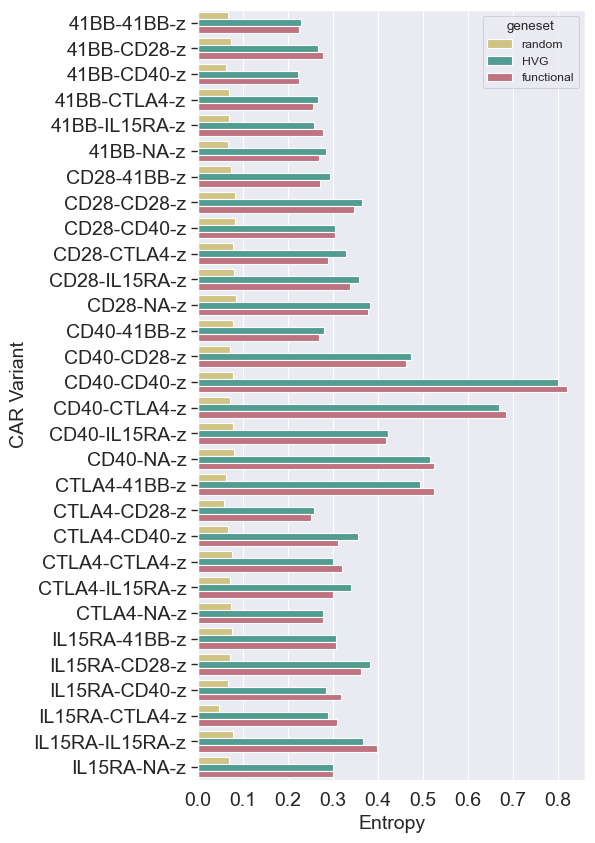

In [21]:
plt.figure(figsize=(5,10))
sns.barplot(data=e, y="CAR", x="entropy", 
            hue="geneset", hue_order=["random", "HVG", "functional"], palette=geneset_map)
plt.xlabel("Entropy", fontsize=14)
plt.ylabel("CAR Variant", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("/path/to/Figures/Geneset_null_model.pdf", bbox_inches="tight")

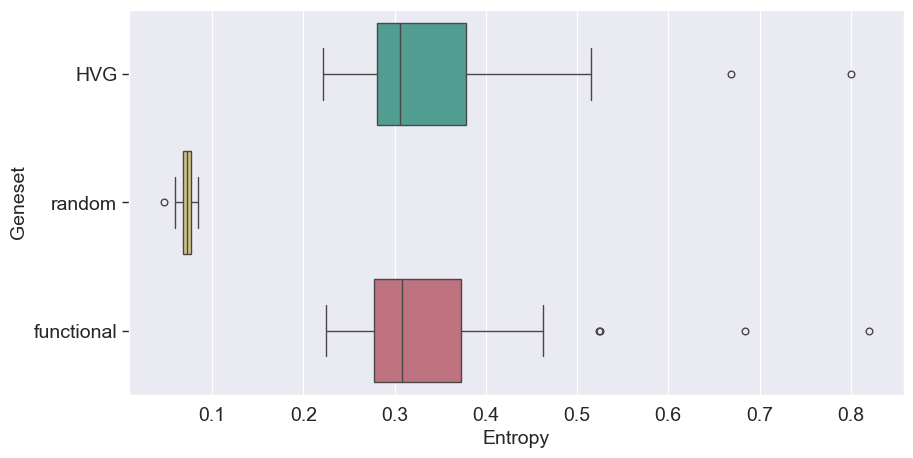

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(data=e, y="geneset", x="entropy", 
            hue="geneset", hue_order=["random", "HVG", "functional"], palette=geneset_map)
plt.xlabel("Entropy", fontsize=14)
plt.ylabel("Geneset", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("/path/to/Figures/Geneset_null_model_boxplot.pdf", bbox_inches="tight")